In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import Imputer
from datetime import timedelta, date
import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson
from sklearn.preprocessing import LabelEncoder
from statsmodels.formula.api import ols
from scipy import stats
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from tqdm import tqdm
import itertools
from dtw import dtw
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import time
from sklearn.metrics import silhouette_score
import csv


In [88]:
data_path = '/Users/s0c02nj/Desktop/ML case/data.csv'

In [89]:
df = pd.read_csv(data_path)

In [90]:
df[df['house_pk'] == 84561]

,house_pk,agency_id,date_in,price,dis_water_real,dis_shopping,no_bedrooms,max_persons,house_size,land_size,build_year,renovation_year,apartment,indoor_pool,spa,internet,pets_allowed,water_view,fire_stove,agency_rating
0,84561,90,2016-08-27,532,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
1,84561,90,2016-08-26,588,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
2,84561,90,2016-08-25,588,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
3,84561,90,2016-08-24,588,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
4,84561,90,2016-08-23,588,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
5,84561,90,2016-08-22,588,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
6,84561,90,2016-08-21,588,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
7,84561,90,2016-08-20,588,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
8,84561,90,2016-08-19,672,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
9,84561,90,2016-08-18,672,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0


#### 1. Groupby House_Pk and Sort the Time series Data

In [121]:
df['date_in'] = pd.to_datetime(df['date_in'])
df_sorted = df.sort_values(by=['house_pk','date_in'])

In [294]:
h1 = df[df['house_pk'] == 84561]
h1 = h1.sort_values(by='date_in')
h1.head()


,house_pk,agency_id,date_in,price,dis_water_real,dis_shopping,no_bedrooms,max_persons,house_size,land_size,build_year,renovation_year,apartment,indoor_pool,spa,internet,pets_allowed,water_view,fire_stove,agency_rating
151,84561,90,2016-02-06,301,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
150,84561,90,2016-02-07,301,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
149,84561,90,2016-02-08,301,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
148,84561,90,2016-02-09,301,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
147,84561,90,2016-02-10,301,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0


#### Checking the Distribution of Price Variation 

(array([  2., 268., 137., 469.,   9.,  58.,  67.,  34.,  35.,  28.]),
 array([ 119. ,  212.1,  305.2,  398.3,  491.4,  584.5,  677.6,  770.7,
         863.8,  956.9, 1050. ]),
 <a list of 10 Patch objects>)

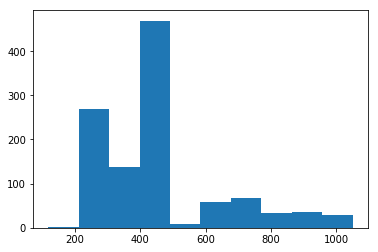

In [295]:
plt.hist(h1['price'])

#### Checking the Time Series Plot

In [296]:
h1['date'] = h1['date_in']
h1 = h1.set_index('date')


(array([735964., 736085., 736208., 736330., 736450., 736573., 736695.,
        736815., 736938., 737060., 737180.]),
 <a list of 11 Text xticklabel objects>)

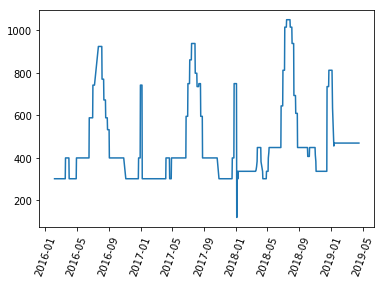

In [297]:
plt.plot(h1['price'])
plt.xticks(rotation=70)


+ Check Stationarity of Data
+ ADF Test of Unit root test of Stationarity

#### Stationarity and Serial Correlation Test Checking

In [312]:
#Time Series Testing
timeseries = h1['price']
adfTest = adfuller(timeseries, autolag='AIC')
adfTest[1]

0.004356332657559843

+ p_value suggests that Data is stationary and we can proceed with the next steps.
+ But we can see clear seasonal pattern in the dat.
+ Let's check the autocorrelation and acf,pacf plots for further analysis.

In [313]:
durbin_watson(timeseries)

0.006340850267464138

+ The Durbin Watson test reports a test statistic, with a value from 0 to 4, where:
+ 2 is no autocorrelation.
+ 0 to <2 is positive autocorrelation (common in time series data).

+ Durbin Watson Test of Serial Correlation indicates that their is serial correlation present in the observations 
+ and hence we will try to do regression with some independent variables to remove any significant effect

In our case, the DW test statistic is near to zero which indicates there is significant impact of time in the above data 


#### Removing Seasonality
+ The first approach to remove seasonality is to use the available information of hour,day,month,week  which is varying and trying to extract the same from the data with the frequency variables

In [314]:
h1['year'] =  h1['date_in'].dt.year
h1['month'] = h1['date_in'].dt.month
h1['week'] = h1['date_in'].dt.week
h1['day'] =  h1['date_in'].dt.day


In [315]:
df_h1 = h1[['year','month','week','day','price']]

#### Dummy Variable Regression to remove effects

In [316]:
dummy_model = ols(formula='price~C(year)+C(month)+C(week)+ C(day)', 
                    data=df_h1).fit()

In [317]:
dummy_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 09 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:48:25   Log-Likelihood:                -6059.5
No. Observations:                1107   AIC:                         1.231e+04
Df Residuals:                    1011   BIC:                         1.279e+04
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         565.0031     17.780     31.778      0.000     530.114     599.892
C(year)[T.2017]    -1.0503      4.973     -0.211      0.833     -10.808       8.708
C(year)[T.2018]    52.4275      4.970     10.548      0.000      42.674      62.181
C(year)[T.2019]   166.6246      7.856     21.209      0.000     151.208     182.041
C(month)[T.2]       5.9653     25.656      0.233      0.816     -44.379      56.310
C(month)[T.3]      -2.8910     35.091     -0.082      0.934     -71.751      65.969
C(month)[T.4]     -30.0031     43.232     -0.694      0.488    -114.838      54.832
C(month)[T.5]      64.0517     53.133      1.206      0.228     -40.211     168.315
C(month)[T.6]      67.7956     55.736      1.216      0.224     -41.577     177.168
C(month)[T.7]     166.9274     57.661      2.895      0.004      53.779     280.076
C(month)[T.8]     140.2371     56.941      2.463      0.014      28.501     251.974
C(month)[T.9]     129.0348     56.205      2.296      0.022      18.743     239.327
C(month)[T.10]    111.8507     51.842      2.158      0.031      10.120     213.581
C(month)[T.11]     78.3033     46.083      1.699      0.090     -12.126     168.733
C(month)[T.12]     66.5390     41.489      1.604      0.109     -14.875     147.953
C(week)[T.2]     -219.5752     20.488    -10.717      0.000    -259.779    -179.371
C(week)[T.3]     -239.9783     21.645    -11.087      0.000    -282.452    -197.504
C(week)[T.4]     -246.0697     21.154    -11.632      0.000    -287.581    -204.558
C(week)[T.5]     -257.2085     24.683    -10.420      0.000    -305.644    -208.773
C(week)[T.6]     -234.8435     31.506     -7.454      0.000    -296.668    -173.019
C(week)[T.7]     -240.5212     33.293     -7.224      0.000    -305.852    -175.191
C(week)[T.8]     -250.5076     33.647     -7.445      0.000    -316.533    -184.482
C(week)[T.9]     -248.7901     35.324     -7.043      0.000    -318.107    -179.473
C(week)[T.10]    -225.6547     39.585     -5.700      0.000    -303.334    -147.976
C(week)[T.11]    -224.3392     41.098     -5.459      0.000    -304.985    -143.693
C(week)[T.12]    -203.8726     41.848     -4.872      0.000    -285.991    -121.754
C(week)[T.13]    -197.9582     41.085     -4.818      0.000    -278.579    -117.337
C(week)[T.14]    -176.3295     46.320     -3.807      0.000    -267.224     -85.435
C(week)[T.15]    -174.0596     47.807     -3.641      0.000    -267.871     -80.248
C(week)[T.16]    -201.4291     48.932     -4.117      0.000    -297.449    -105.410
C(week)[T.17]    -212.2700     48.774     -4.352      0.000    -307.979    -116.561
C(week)[T.18]    -232.4155     54.628     -4.255      0.000    -339.612    -125.219
C(week)[T.19]    -191.3179     56.679     -3.375      0.001    -302.541     -80.095
C(week)[T.20]    -201.6285     58.054     -3.473      0.001

+ As, we can see quite high value of regression coefficient and significance of many 
+ of the levels indicate that the factors are 
+ important and relevant
+ So, we will separate out the effect of these features and extract the residuals
+ which will not have much Seasonality effect.


In [318]:
#DW Test on residuals
resid = dummy_model.resid
durbin_watson(resid)

0.5711869008213804

(array([735964., 736085., 736208., 736330., 736450., 736573., 736695.,
        736815., 736938., 737060., 737180.]),
 <a list of 11 Text xticklabel objects>)

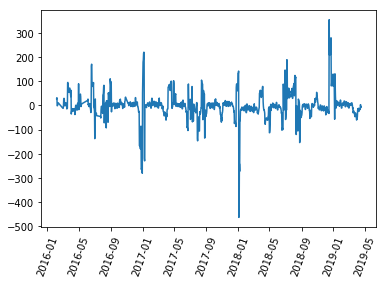

In [321]:
plt.plot(h1['date_in'],resid)
plt.xticks(rotation=70)


+ As, we can see that Seasonality have been reduce using the previous method.
+ And DW statistic has increased from the initial value to 0.6
+ Now we can go for Moving average based methods to remove/cancel out the effects of Further Seasonality or 
+ Further Frequency domain and Spectral Analysis needs to be done to remove finer frequency components

#####  Ideal Scenario is to go for Frequency Domain Analysis/ Spectral Domain to understand the impact of exact seasonal measurements

####  Observations From the data
+ Once cycle starts at 
+ As observed from the data, the month August-Sept has the peak

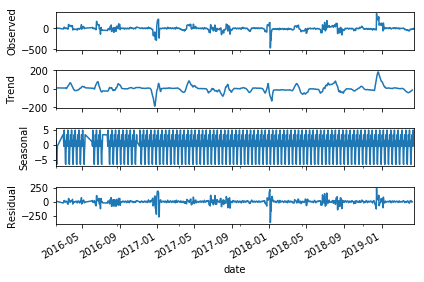

In [320]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(resid, freq=12)
result.plot()
pyplot.show()

In [216]:
# from matplotlib import pyplot
# from statsmodels.tsa.seasonal import seasonal_decompose
# result = seasonal_decompose(resid, model='additive', freq=5)
# result.plot()
# pyplot.show()

In [322]:
# decomposition = seasonal_decompose(timeseries, freq=)  
# fig = plt.figure()  
# fig = decomposition.plot()  
# fig.set_size_inches(15, 8)
